In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("results.csv")

In [24]:
pbp = df.loc[df["Feature"] == "Pixel By Pixel"]
lbp = df.loc[(df["Feature"] == "LBP") & (df["Unifrom"] == False)]
lbp_u = df.loc[(df["Feature"] == "LBP") & (df["Unifrom"] == True)]

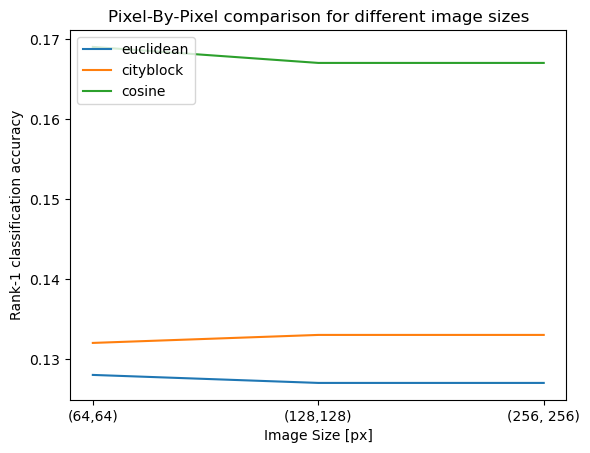

In [56]:
plt.plot(pbp.loc[pbp["Metric"] == "euclidean"]["Result"].values)
plt.plot(pbp.loc[pbp["Metric"] == "cityblock"]["Result"].values)
plt.plot(pbp.loc[pbp["Metric"] == "cosine"]["Result"].values)
plt.legend(["euclidean", "cityblock", "cosine"], loc ="upper left")
plt.title("Pixel-By-Pixel comparison for different image sizes")
plt.xticks([0,1,2], ["(64,64)","(128,128)","(256, 256)"])
plt.xlabel("Image Size [px]")
plt.ylabel("Rank-1 classification accuracy")
plt.show()


In [163]:
df_correct = lbp.loc[lbp["Metric"] == "euclidean"].groupby('Image Size')['Result'].apply(lambda x: (x >= 0.25).sum()).reset_index(name='count')
df_false = lbp.loc[lbp["Metric"] == "euclidean"].groupby('Image Size')['Result'].apply(lambda x: (x < 0.06).sum()).reset_index(name='count')

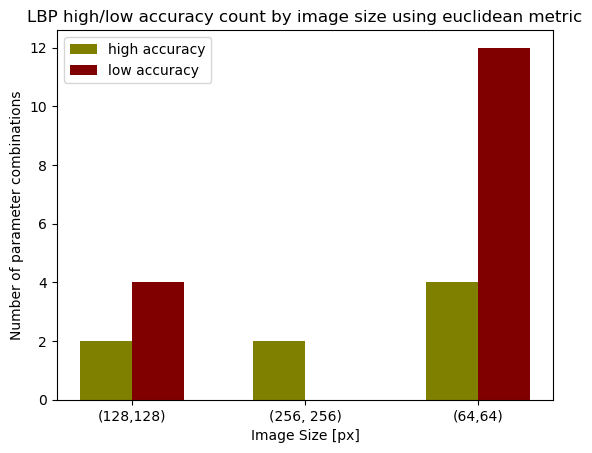

In [164]:
plt.bar([1,2,3], df_correct["count"].values, width=0.3, color="olive")
plt.bar(np.array([1,2,3]) + 0.3, df_false["count"].values, width=0.3, color="maroon")
plt.xticks([1.15,2.15,3.15], ["(128,128)","(256, 256)","(64,64)"])
plt.legend(["high accuracy", "low accuracy"], loc="upper left")
plt.title("LBP high/low accuracy count by image size using euclidean metric")
plt.xlabel("Image Size [px]")
plt.ylabel("Number of parameter combinations")
plt.show()